In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("downloads/archive (1)/gym_membership_prediction.csv")

In [35]:
print(df.isnull().sum())

User ID                  0
Age                      0
Gender                   0
Annual Income            0
Membership Type          0
Membership Duration      0
Frequency of Visit       0
Preferred Time           0
Previous Membership      0
Marital Status           0
Location                 0
Promotion Response       0
Health Condition         0
Membership Prediction    0
Professional             0
Professional Status      0
dtype: int64


In [37]:
print(df.duplicated().sum())

0


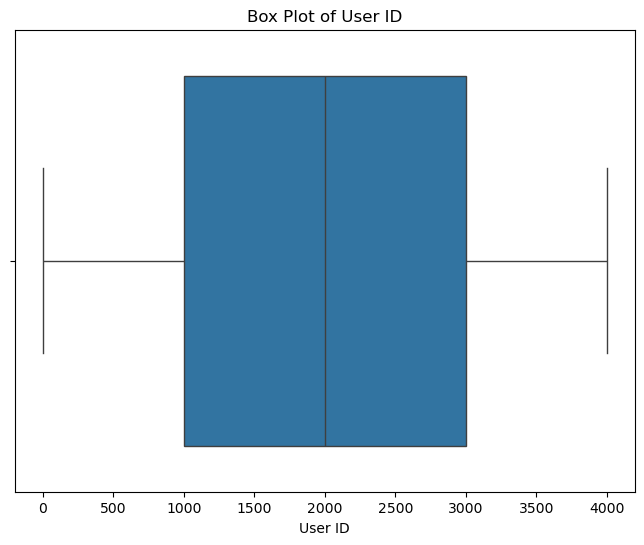

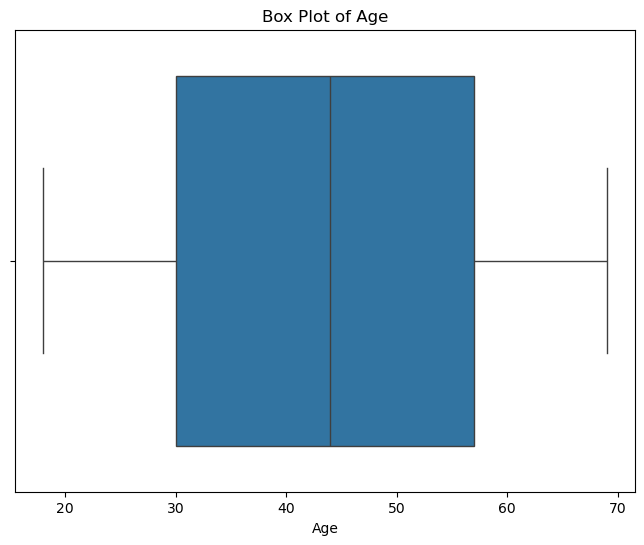

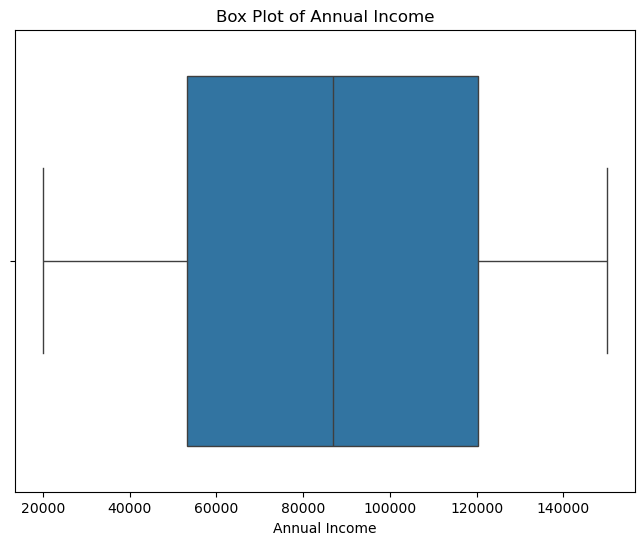

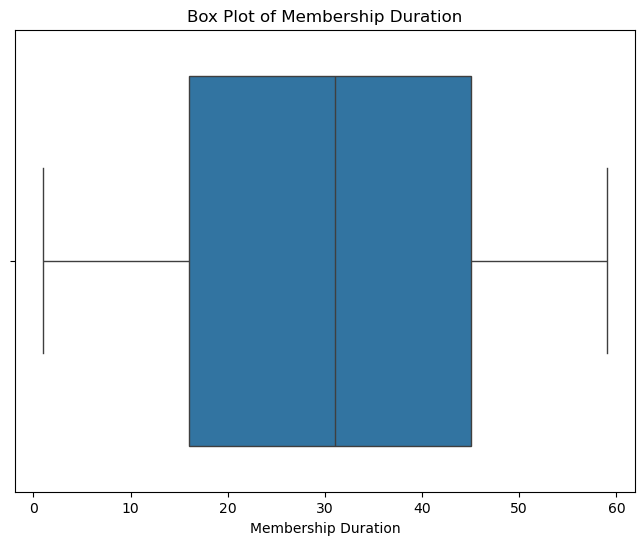

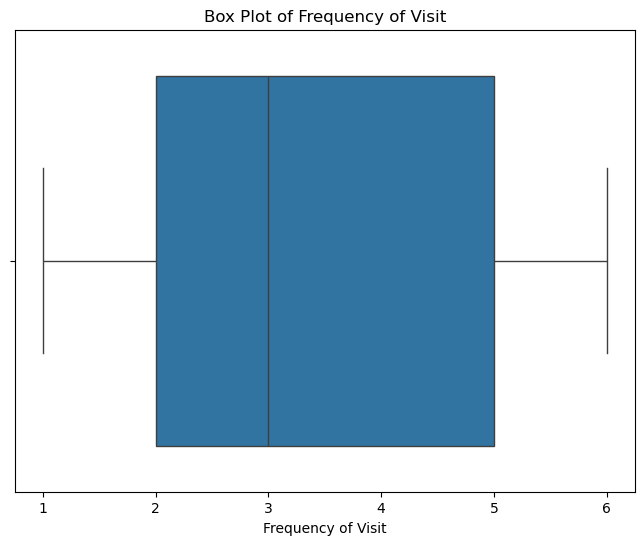

In [39]:
# --- Inspect and Handle Outliers ---
# Box plots for numerical features
for col in df.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

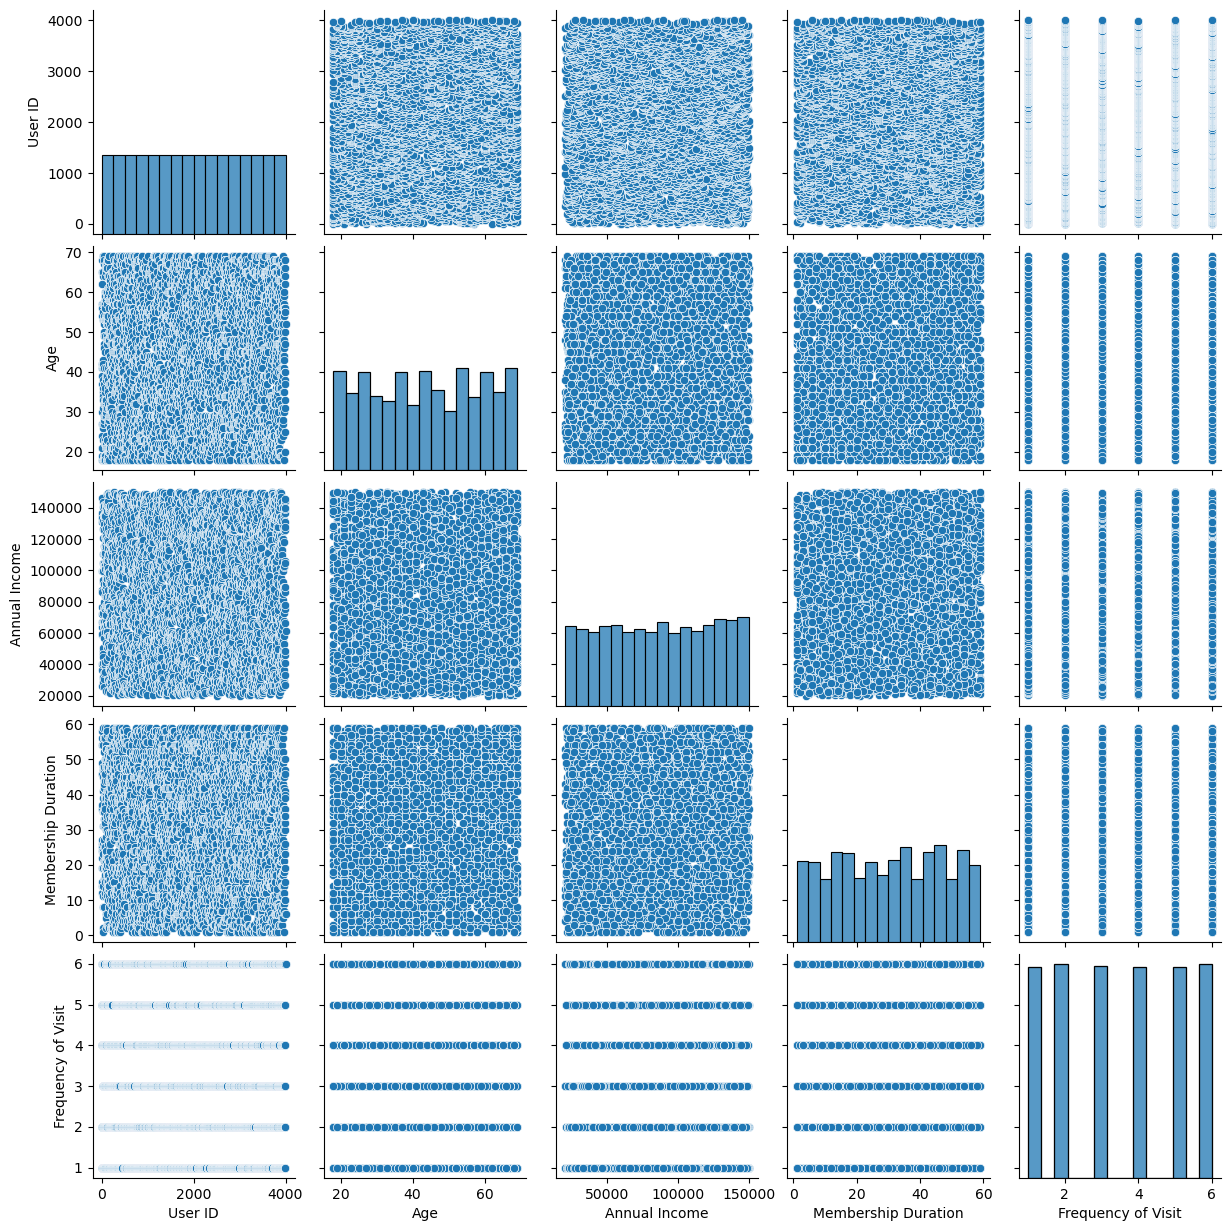

In [41]:
# Scatter plots for numerical features to check relationships
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

In [43]:
df1=df.copy()

In [45]:
# Remove the specified columns from df1
columns_to_remove = ['User ID', 'Gender', 'Preferred Time', 'Marital Status', 
                     'Location', 'Promotion Response']

df1 = df1.drop(columns=columns_to_remove)

# Display the first few rows of the updated dataset
print(df1.head())


   Age  Annual Income Membership Type  Membership Duration  \
0   62         135305         Premium                   46   
1   65          59056           Basic                   26   
2   18          63857           Basic                   46   
3   21         135072           Basic                   54   
4   21          59344           Basic                   36   

   Frequency of Visit Previous Membership Health Condition  \
0                   2                 Yes          Average   
1                   6                 Yes             Good   
2                   2                  No        Excellent   
3                   1                  No             Good   
4                   5                 Yes        Excellent   

  Membership Prediction Professional Professional Status  
0                    No  Late Career             Retired  
1                    No      Retired             Retired  
2                    No      Student             Student  
3                 

In [47]:
df2 = df1.copy()

In [49]:
# Change column names to lowercase
df2.columns = df2.columns.str.lower()

# Change attribute values in all categorical columns to lowercase
categorical_columns = df2.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_columns:
    df2[col] = df2[col].str.lower()

# Display the first few rows of the updated DataFrame
print(df2.head())


   age  annual income membership type  membership duration  \
0   62         135305         premium                   46   
1   65          59056           basic                   26   
2   18          63857           basic                   46   
3   21         135072           basic                   54   
4   21          59344           basic                   36   

   frequency of visit previous membership health condition  \
0                   2                 yes          average   
1                   6                 yes             good   
2                   2                  no        excellent   
3                   1                  no             good   
4                   5                 yes        excellent   

  membership prediction professional professional status  
0                    no  late career             retired  
1                    no      retired             retired  
2                    no      student             student  
3                 

In [51]:
# Remove spaces and commas from the entire dataset
df2 = df2.applymap(lambda x: x.replace(" ", "").replace(",", "") if isinstance(x, str) else x)

# Display the first few rows to verify
print(df2.head())


   age  annual income membership type  membership duration  \
0   62         135305         premium                   46   
1   65          59056           basic                   26   
2   18          63857           basic                   46   
3   21         135072           basic                   54   
4   21          59344           basic                   36   

   frequency of visit previous membership health condition  \
0                   2                 yes          average   
1                   6                 yes             good   
2                   2                  no        excellent   
3                   1                  no             good   
4                   5                 yes        excellent   

  membership prediction professional professional status  
0                    no   latecareer             retired  
1                    no      retired             retired  
2                    no      student             student  
3                 

C:\Users\educa\AppData\Local\Temp\ipykernel_38888\2610058921.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: x.replace(" ", "").replace(",", "") if isinstance(x, str) else x)


In [59]:
# One-hot encode all categorical columns in df2
df2_encoded = pd.get_dummies(df2, drop_first=True)

# Display the first few rows of the encoded DataFrame
print(df2_encoded.head())


   age  annual income  membership duration  frequency of visit  \
0   62         135305                   46                   2   
1   65          59056                   26                   6   
2   18          63857                   46                   2   
3   21         135072                   54                   1   
4   21          59344                   36                   5   

   membership type_premium  membership type_vip  previous membership_yes  \
0                     True                False                     True   
1                    False                False                     True   
2                    False                False                    False   
3                    False                False                    False   
4                    False                False                     True   

   health condition_excellent  health condition_good  health condition_poor  \
0                       False                  False               

In [61]:
# Convert True/False to 1/0 in the entire DataFrame
df2_encoded = df2_encoded.astype(int)

# Display the first few rows to verify
print(df2_encoded.head())


   age  annual income  membership duration  frequency of visit  \
0   62         135305                   46                   2   
1   65          59056                   26                   6   
2   18          63857                   46                   2   
3   21         135072                   54                   1   
4   21          59344                   36                   5   

   membership type_premium  membership type_vip  previous membership_yes  \
0                        1                    0                        1   
1                        0                    0                        1   
2                        0                    0                        0   
3                        0                    0                        0   
4                        0                    0                        1   

   health condition_excellent  health condition_good  health condition_poor  \
0                           0                      0               

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns to scale
numerical_columns = ['age', 'annual income', 'membership duration', 'frequency of visit']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler to the numerical columns
df2_encoded[numerical_columns] = scaler.fit_transform(df2_encoded[numerical_columns])

# Display the first few rows of the scaled dataset
print(df2_encoded.head())


        age  annual income  membership duration  frequency of visit  \
0  0.862745       0.887058             0.775862                 0.2   
1  0.921569       0.300229             0.431034                 1.0   
2  0.000000       0.337179             0.775862                 0.2   
3  0.058824       0.885265             0.913793                 0.0   
4  0.058824       0.302446             0.603448                 0.8   

   membership type_premium  membership type_vip  previous membership_yes  \
0                        1                    0                        1   
1                        0                    0                        1   
2                        0                    0                        0   
3                        0                    0                        0   
4                        0                    0                        1   

   health condition_excellent  health condition_good  health condition_poor  \
0                           0        

In [71]:
# Define features (X) and target (y)
X = df2_encoded.drop(columns=['membership prediction_yes'])  # Drop the target column
y = df2_encoded['membership prediction_yes']  # Target variable


In [75]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.51625
              precision    recall  f1-score   support

           0       0.52      0.52      0.52       405
           1       0.51      0.51      0.51       395

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.52       800
weighted avg       0.52      0.52      0.52       800

